# 直方图
![](pic/直方图.png)

![](pic/cv.png)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

img = cv2.imread("pic/car.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

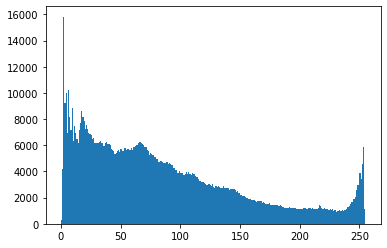

In [2]:
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
# cv_show(hist,"hist_mask")
plt.hist(gray.ravel(),256)
plt.show()

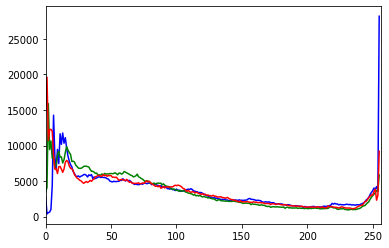

In [3]:
color = ('b','g','r')
for i ,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color =col)
    plt.xlim([0,256])

In [4]:
histr

array([[14709.],
       [19609.],
       [10723.],
       [12234.],
       [12277.],
       [12004.],
       [ 8727.],
       [ 6682.],
       [ 6735.],
       [ 6058.],
       [ 7026.],
       [ 7060.],
       [ 6691.],
       [ 6225.],
       [ 6685.],
       [ 7629.],
       [ 7911.],
       [ 7743.],
       [ 7138.],
       [ 6801.],
       [ 6728.],
       [ 6440.],
       [ 5906.],
       [ 5645.],
       [ 5403.],
       [ 5303.],
       [ 5111.],
       [ 5026.],
       [ 4843.],
       [ 4685.],
       [ 4810.],
       [ 4933.],
       [ 4803.],
       [ 4926.],
       [ 5091.],
       [ 4958.],
       [ 5194.],
       [ 5276.],
       [ 5614.],
       [ 5654.],
       [ 5803.],
       [ 5779.],
       [ 5697.],
       [ 5663.],
       [ 5914.],
       [ 5743.],
       [ 5832.],
       [ 5667.],
       [ 5791.],
       [ 5761.],
       [ 5765.],
       [ 5540.],
       [ 5557.],
       [ 5491.],
       [ 5551.],
       [ 5320.],
       [ 5107.],
       [ 5186.],
       [ 5228.

### 创建mask

In [5]:
import numpy as np
mask = np.zeros(img.shape[:2],np.uint8)
print(mask.shape)

(720, 1280)


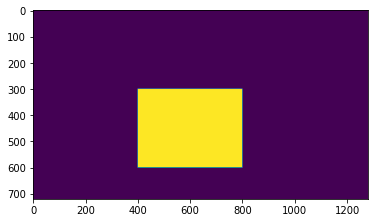

In [6]:
mask[300:600,400:800] = 255
plt.imshow(mask)

In [7]:
cv_show(mask,"s")

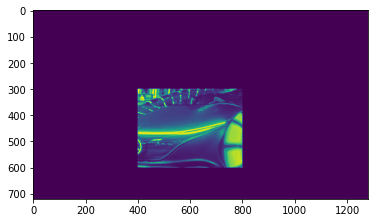

In [8]:
masked_img = cv2.bitwise_and(gray,gray,mask = mask)
plt.imshow(masked_img)

In [9]:
hist_full =  cv2.calcHist([gray],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([gray],[0],mask,[256],[0,256])

(0.0, 256.0)

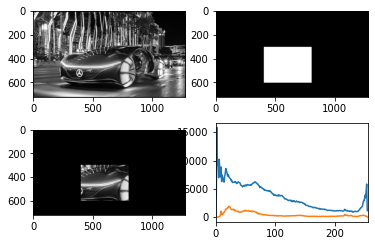

In [10]:
plt.subplot(221),plt.imshow(gray,"gray")
plt.subplot(222),plt.imshow(mask,"gray")
plt.subplot(223),plt.imshow(masked_img,"gray")
plt.subplot(224),plt.plot(hist_full),plt.plot(hist_mask)
plt.xlim([0,256])

### 直方图均衡化
![](pic/均衡化1.png)
![](pic/均衡化2.png)
![](pic/均衡化3.png)

(0.0, 256.0)

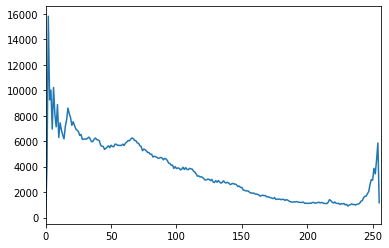

In [11]:
plt.plot(hist_full)
plt.xlim([0,256])

(array([  285.,  4180.,     0.,     0.,     0.,     0., 15823.,     0.,
         9242.,     0.,     0., 10017.,     0.,  6956.,     0.,     0.,
        10223.,     0.,  8140.,     0.,  7133.,     0.,  8874.,     0.,
         6297.,     0.,  7448.,     0.,  6901.,     0.,  6479.,     0.,
         6186.,     0.,  7156.,     0.,  7684.,     0.,  8604.,     0.,
         8174.,     0.,  7852.,     0.,  7251.,     0.,     0.,  7531.,
            0.,  7260.,  6966.,     0.,  6860.,     0.,  6761.,     0.,
         6454.,     0.,  6532.,     0.,  6148.,  6154.,     0.,  6181.,
            0.,  6157.,  6234.,     0.,  6324.,     0.,  6182.,  5965.,
            0.,  5969.,     0.,  6155.,     0.,  6249.,  6135.,     0.,
         6098.,     0.,  6042.,  5682.,     0.,  5603.,  5592.,     0.,
         5352.,  5441.,     0.,  5547.,  5643.,     0.,  5484.,  5684.,
            0.,  5586.,     0.,  5564.,  5772.,     0.,  5755.,  5673.,
            0.,  5678.,  5668.,     0.,  5670.,     0.,  5773., 

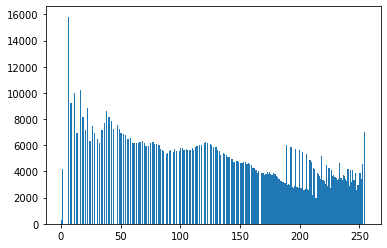

In [12]:
equ = cv2.equalizeHist(gray)
plt.hist(equ.ravel(),256)

In [13]:
cv_show(equ,"equ")

In [14]:
res = np.hstack((gray,equ))
cv_show(res,"res")

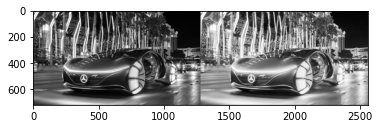

In [15]:
plt.imshow(res,"gray")

#### 结果中可以看出了，均衡化后弱化了一些图像的特征
#### 因此一般采用局部均衡化

In [16]:
# 自适应均衡化
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
res_clahe = clahe.apply(gray)
res = np.hstack((res,res_clahe))
cv_show(res,"res")

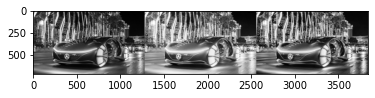

In [17]:
plt.imshow(res,"gray")